#TEMPLATE BDA LAB 2020/2021



## RISORSE UTILI
- [Python Cheatsheet](https://www.pythoncheatsheet.org/#Python-Basics)
- [Scientific Python Cheatsheet](https://ipgp.github.io/scientific_python_cheat_sheet/)
- [Pandas API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
- [Numpy Manual](https://numpy.org/devdocs/)
- [SciKit Learn User Guide](https://scikit-learn.org/stable/user_guide.html)

## The STEPS FOR DATA ANALISYS AND ML PROBLEMS :
1. Load and plot (optional) data to understand the problem
2. (Optional, recommended) data normalization / standardization - great influence on models that estimate on distances - gradient descent much faster
3. (Optional) feature selection / dimensionality reduction
4. Algorithm comparison and choice - train with cross validation ----- NB : scoring!!
5. Validation curve / learning curve
6. (Optional) algorithm tuning
7. Make predictions - confusion matrix & classification report


NB : always feature selection AFTER feature scaling

ps -> no validation curve or learning curve in this file. Search in the other if needed

# 0) SETUP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#eventuale comando per ignorare i warnings

#import warnings
#warnings.filterwarnings('ignore')
#sns.set() #visualizza i grafici in stile seaborn

import sklearn as sk #si può importare anche dopo, per la parte di ML

# 1) DATA LOADING AND VISUALIZATION

In [ ]:
#CARICAMENTO DEL DATASET
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url, header=None, names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'],sep=',')

In [ ]:
#istanzio valori nan, -1 e 0 per fare degli esempi più in là (ignorare)
data.petal_length[10:30] = np.nan
data.petal_width[2:4] = 0
data.sepal_length[44:79] = -1
data.sepal_width[0:10] = np.nan

### Understanding the Data

In [ ]:
ds = #your dataframe here
ds_class = #your class series here (to preditc) (example: data['weather'])

print("\nNumero istanze nel dataset:", ds.shape[0],"\nNumero colonne: ", ds.shape[1])
print("\nLISTA COLONNE:\n", ds.columns)
print("\nVALORI TOTALI NaN:\n", ds[ds.isna().any(axis=1)])
print("\nVALORI NaN PER COLONNE:\n", ds.isna().sum())
print("\nVALORI TOTALI NULLI:\n", ds.isna().sum().sum())
print("\nVALORI NULLI PER COLONNA:\n", ds[(ds == 0)].sum(axis=0))
print("\nNUMERO DI CLASSI DEL DATASET E CONTEGGIO:\n", ds_class.value_counts())

In [ ]:
#bar plot del numero di classi
ds_class.value_counts().plot.bar()

#istogramma delle features
ds.hist(figsize=(10,12))
plt.show()

In [ ]:
data.head(3) #stampa le prime 3 righe

data.info()
#elenca le colonne e mi dice il tipo di dato, inoltre conta i volori non nulli

data.describe()
#dati statiscici per le colonne numeriche
#utile per capire se ci sono valori fuori dalla norma (min e max) e/o colonne nulle

data.shape #numero di righe e colonne

data.columns #ritorna una list con nomi delle colonne (utile per iterare)

data['class'].value_counts()
#conta il numero delle istanze di quella colonna e fai il sorting in ordine decrescente

data['sepal_length'].value_counts().head(3)
#vedo quali sono i valori più ripetuti di sepal lenght
#vedo che ho 35 volte dei -1

[Learning Pivot Tables](https://www.oreilly.com/content/pivot-tables/?imm_mid=0d4c1a&cmp=em-data-na-na-newsltr_20150708)

In [ ]:
#PIVOT TABLES

df = pd.read_csv('/content/titanic.csv') #dataset del titanic da caricare
df.head()

df.pivot_table(index='sex') #media dei sopravvissuti per sesso
df.pivot_table(index='sex',columns='class')['survived'] #media dei sopravvissuti per sesso e classe di imbarco
#la funzione applicata di default è la media

In [ ]:
#CROSSTAB
summary = pd.crosstab(dataset.promotion_last_5years, dataset.left)
print(summary)

print('\n')
print('% left given promotion     : ', 100*(summary[1][1]/summary[0][1]))
print('% left not given promotion : ', 100*(summary[1][0]/summary[0][0]))
'''
STAMPA A VIDEO QUESTO:

left                       0     1
promotion_last_5years             
0                      11128  3552
1                        300    19


% left given promotion     :  6.333333333333334
% left not given promotion :  31.919482386772106
'''

**Outliers detection**

In [ ]:
petals_width = data['petal_width']
big_flowers = data[ petals_width >= petals_width.quantile(0.95)]
#considero il dataframe data con i fiori che hanno petal_width maggiore uguale al 95-esimo percentile

In [ ]:
max_temps = data.temp_max #considero la lista dei valori massimi
top5_temps = data[max_temps >= max_temps.quantile(0.95)] #tra la lista dei valori massimi, prendo i superiori al 95-esimo percentile
#maschera booleana su "data" così mantengo tutte le features e posso studiarle per gli outliers

In [ ]:
#BOXPLOT DI OGNI FEATURE PER VEDERE GLI OUTLIERS
for i in range(len(df_name[:-1])):
    plt.figure()
    df[df_name[i]].plot(kind='box')

### Visualizing Data

- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- [Seaborn categorical data plots](https://seaborn.pydata.org/tutorial/categorical.html)

In [ ]:
data.iloc[:,:3].hist(figsize=(10,12), bins=25)
plt.show()
#istogramma delle features numeriche
#se non si inseriscono i bins, vengono calcolati da soli

In [ ]:
#alternativa più carina
plt.figure()
data.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

In [ ]:
#PLOTTA L'ISTOGRAMMA DELLE FEATURES COLORATE SECONDO LA CLASSE ASSOCIATA
target = "Outcome" #nome colonna della classe

for i in range(len(df_name[:-1])):
    plt.figure()
    df.groupby(target)[df_name[i]].plot(kind='hist',alpha=0.8,legend=True,title=df_name[i])

In [ ]:
data.groupby('class').size().plot(kind='bar')
plt.show()
#vedo se il dataset è bilanciato, facendo un bar plot del numero di classi presenti

In [ ]:
#PLOT CURVA DI DISTRIBUZIONE + ISTOGRAMMA
plt.figure()
sns.distplot(data_to_show, bins=100, color='k')

In [ ]:
sns.pairplot(data)
#pairplot per vedere gli scatterplot tra coppie di features
sns.pairplot(data, hue="class")
#usa diversi colori a seconda della classe (valori diversi nella colonna 'class')

In [ ]:
#quali sono le coppie di features numeriche più o meno correlate?
sns.heatmap(data.corr(),annot=True)
#utilizzare annot=False quando si hanno molti valori (evito di rendere confuso il grafico)

In [ ]:
#stampo i valori medi per features a seconda della classe
#in questo modo vedo quali potrebbero essere le features che aiutano a generalizzare meglio
#posso così anche stimare quali altre features potrei rimuovere

data_mean = data.groupby('class').mean()
plt.figure()
data_mean.plot.bar(subplots=True, layout=(4,3), figsize=(15, 25))

In [ ]:
(data.groupby('class').size()/len(data)).plot(kind='bar',)
plt.show()
#percentuale relativa delle classi/di una feature passata per il groupby

In [ ]:
data.groupby(['petal_length','class']).size().unstack().plot.bar()
#barchart dato dalla classe e da un feature della classe (per vedere variazioni di quella feature tra classi)

In [ ]:
data[np.logical_and(data.sepal_length >= 0.3 , data.sepal_width < 2.4)] #filtro su più features numeriche

# 2)DATA MODIFICATION - NORMALIZATION - STANDARDIZATION

### Dealing with NAN and improper data, removing things

[Handling Missing Data](https://www.oreilly.com/content/handling-missing-data/)

In [ ]:
data.fillna(0) #rimpiazzo con 0 gli NaN
data.fillna({1: 0.5, 2: 0}) #specifico il fill per le colonne

In [ ]:
data[data.isna().any(axis=1)]
#ritorna le righe dove ho almeno un valore NaN

In [ ]:
data.columns[(data == 0).all()]
#check di colonne di zeri

In [ ]:
#cicla sulle colonne e mi dice quanti valori nan ci sono in totale per ognuna
for column in data.columns:
  print("Null values for {}: {} ".format(column, data[column].isna().sum()))

In [ ]:
data.isnull().sum().sort_values(ascending=False)
#alternativa al ciclo for, MOLTO UTILE

In [ ]:
data['sepal_length'].replace({-1: 0},inplace=True)
#sostituisco i valori -1 con degli 0

In [ ]:
data.fillna(value=1,inplace=True)
#rimpiazza i valori NaN con 1 nel dataset
#l'opzione inplace modifica il dataset passato, attenzione!


data.reset_index(drop=True,inplace=True)
#se ho eliminato delle righe, questo comando resetta l'indice delle righe (implicito)
#con drop=True lascio l'indice implicito senza aggiungerne un altro


data[data.duplicated(keep=False)]
#elimina i duplicati (righe)
#l'opzione keep=False conta anche i primi e gli ultimi duplicati
data.drop_duplicates(inplace=True)
#elimina le righe duplicate,aggiornando lo stesso dataframe

In [ ]:
#ELIMINAZIONE RIGHE CON ALMENO UN VALORE (CHE DEFINISCO IO)
to_drop_rows  = dataset[(dataset == 'unknown').any(axis=1)] #righe che hanno una o più valori uguali a 'unknown'

dataset_dropped = dataset.drop(index = to_drop_rows.index) #elimina le righe selezionate prima

In [ ]:
#rimuove le colonne che specifico nella lista 'to_remove'
#vedere prima quali features sono più importanti! (da mantenere)
columns = data.columns
columns = columns.to_list()
print(columns)
to_remove = ['list of columns to remove here']
for element in to_remove:
  columns.remove(element)

print(columns)

less_data = data.drop(columns=columns)
print(less_data)

### Creating/Modifing Data

In [ ]:
data.sort_values(by='sepal_length',ascending=False)
#ordino in ordine discendente secondo l'attributo sepal_length

new_data = data.sort_values(by='sepal_length',ascending=False)
new_data.reset_index(drop=True,inplace=True)
#resetto gli indici dopo avere ordinato
new_data.head()

In [ ]:
#CREAZIONE DATASET DEL TIPO DI DATO CHE DESIDERO (ESCLUDENDO LE ALTRE FEATURES)
numeric = dataset.select_dtypes(include='int64')
#crea un dataset che escule le colonne che non sono di tipo int64

In [ ]:
#INERISCE UN COLONNA DOVE SPECIFICO IO, CON L'ESPRESSIONE CHE VOGLIO

# data.insert(column_index_for_new_feature,'new_feature_name',feature_expression_here)
data.insert(4,'petal_area', (data.petal_length*data.petal_width))
data.head()

In [ ]:
#FUNZIONI APPLICATE AL DATASET
data = data.apply(lambda x: (x - x.min())/(x.max()-x.min()))
#applico una funzione a tutte le colonne: in questo caso applico il min-max per ogni valore

data_copy_norm_exp = data_copy_norm.applymap(lambda x: x+1)
#ho sommato uno ad ogni elemento (applico elemento per elemento)

In [ ]:
#Function Transformer - DEFINISCO UNA FUNZIONE DA APPLICARE AI DATI

import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True) #indichiamo noi la funzione da applicare. 

# NOTA BENE! --> Il validate trasforma l'input in np array (a cui poi applico la funzione definita da me)

X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

# transformer = FunctionTransformer(my_awesome_custom_function, validate=True)

## Pre-Processing: Scaling - Normalizing - Encoding - Binning

[Sklearn Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

### Scaling - Normalizing

In [ ]:
#SCALING/NORMALIZING
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #scaling
from sklearn.preprocessing import Normalizer

preprocessor = #your preproccessor here (ex: StandardScaler, MinMaxScaler, Normalizer, etc...)

preprocessor.fit_trasnform(X_train)
preprocessor.transform(X_test) #solo transform per il test, dato che ho fatto il fit sul train per trovare i miei valori e processare

### Binning

In [ ]:
X = #il mio array multidimensionale numpy/dataframe

binner = KBinsDiscretizer(n_bins=[3, 2, 3], encode='ordinal').fit(X) #abbiamo specificato il numero di bins per colonna!
binner.transform(X)
#ci sono vari modi con cui posso fare la divisione: quantile, uniforme kmeans
#ci sono vari metodi per l'encoding

In [ ]:
#BINNING DI UNA FEATURE (COLONNA)
data_discrete = data.copy() #creo una copia del dataset
data_discrete['petal_length'] = pd.cut(discrete_iris['petal_lenght'],4) #discretizza in 4 bin la colonna petal_length 
numeric_binned['age'] = pd.cut(numeric_binned['age'],bins=3,labels=[0,1,2])
#oltre a discretizzare, impartisce delle label specificate da me per ogni bin

In [ ]:
#BINNING DI TUTTE LE COLONNE DEL DATASET
all_discrete = data.copy()
for column in all_discrete.columns:
  all_discrete[column] = pd.cut(all_discrete[column],4)
print(all_discrete)
#posso modificare scegliendo solo le colonne che desidero discretizzare

### Dealing with categorical values/One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = preprocessing.OneHotEncoder(handle_unknown='error') #enconding con un one hot encoder
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X) 

enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Firefox']]).toarray()

#due modi per rappresentare le matrici: modo sparso e modo denso
#La forma sparse = True, mi da una matrice non visualizzabile, ecco perchè la passo ad un array (denso)
#oppure metto sparse = False quando creo il OneHotEncoder

#il metodo .toarray() mi sputa fuori l'arrray con l'encoding fatto

In [ ]:
#RIMPIAZZA VALORI CATEGORICI CON NUMERI

data = data.replace(['iris-setosa','iris-versicolor' 'iris-virginica'],[0,1,2])
#si può anche usare un dizionario per comodità

In [ ]:
#ENCODING NUMERICO DI VALORI CATEGORICI PER OGNI COLONNA (solo colonne di tipo obj)

categ = dataset.select_dtypes(include='object')

for col in categ.columns:

  unique = categ[col].unique() #lista valori cat. unici per colonna
  
  categ.loc[:,col] = categ.loc[:,col].replace(unique, np.arange(len(unique))) #rimpiazzo con un valore numerico da 0 ad n-1 gli n valori unici possibili

print(categ.head())
print(categ['y'].value_counts())

#posso poi eliminare le colonne categoriche del dataset iniziale e poi fare un join
dataset_dropped = dataset.drop(columns = categ.columns)
numeric = dataset_dropped.join(categ)

print(numeric)

In [ ]:
#ONE-HOT ENCODING FEATURES CATEGORICHE
# creare un nuovo dataframe con dummies features solo su determinate colonne


new_data = data.copy()

todummy = 'age_new' # colonne da dummizzare could be data.dtypes == 'object'
dummies = pd.get_dummies(data_numeric[todummy])

new_data = new_data.drop(todummy, axis=1) #rimuove le colonne su cui fare one-hot encoding
new_data = new_data.join(dummies) #unisce le due tabelle

In [ ]:
#ALTERNATIVA, SU TUTTE LE COLONNE
#ciclo sulle colonne e faccio one hot encoding, poi le riaggiungo al dataset
for column in discrete_iris.columns:
  discrete_iris= discrete_iris.join(pd.get_dummies(discrete_iris[column], prefix=column))

# discrete_iris = discrete_iris.drop() Devo poi togliere le colonne che non sono codificate

### Dataset Balance

In [ ]:
# balance a data with resampling
from sklearn.utils import resample

bigger = data_air[data_air['SIZE']==1] 
smaller = data_air[data_air['SIZE']==3]

# bilanciamo le classi 
smaller = resample(smaller, replace=True, n_samples=5000) # can be also n_samples=len(bigger)
bigger = resample(bigger, replace=True, n_samples=5000) # non cessary if previous n_samples = len(bigger)

data_bal = pd.concat([bigger, smaller])
data_bal.groupby('SIZE').size()

# 3)(Optional) feature selection / dimensionality reduction

In [ ]:
#PCA qui
#metodi per capire quali sono le features che influiscono di più sulla predizione qui
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE



# 4)ALGORITHM COMPARISON AND CHOICE

[Choosing the right model](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

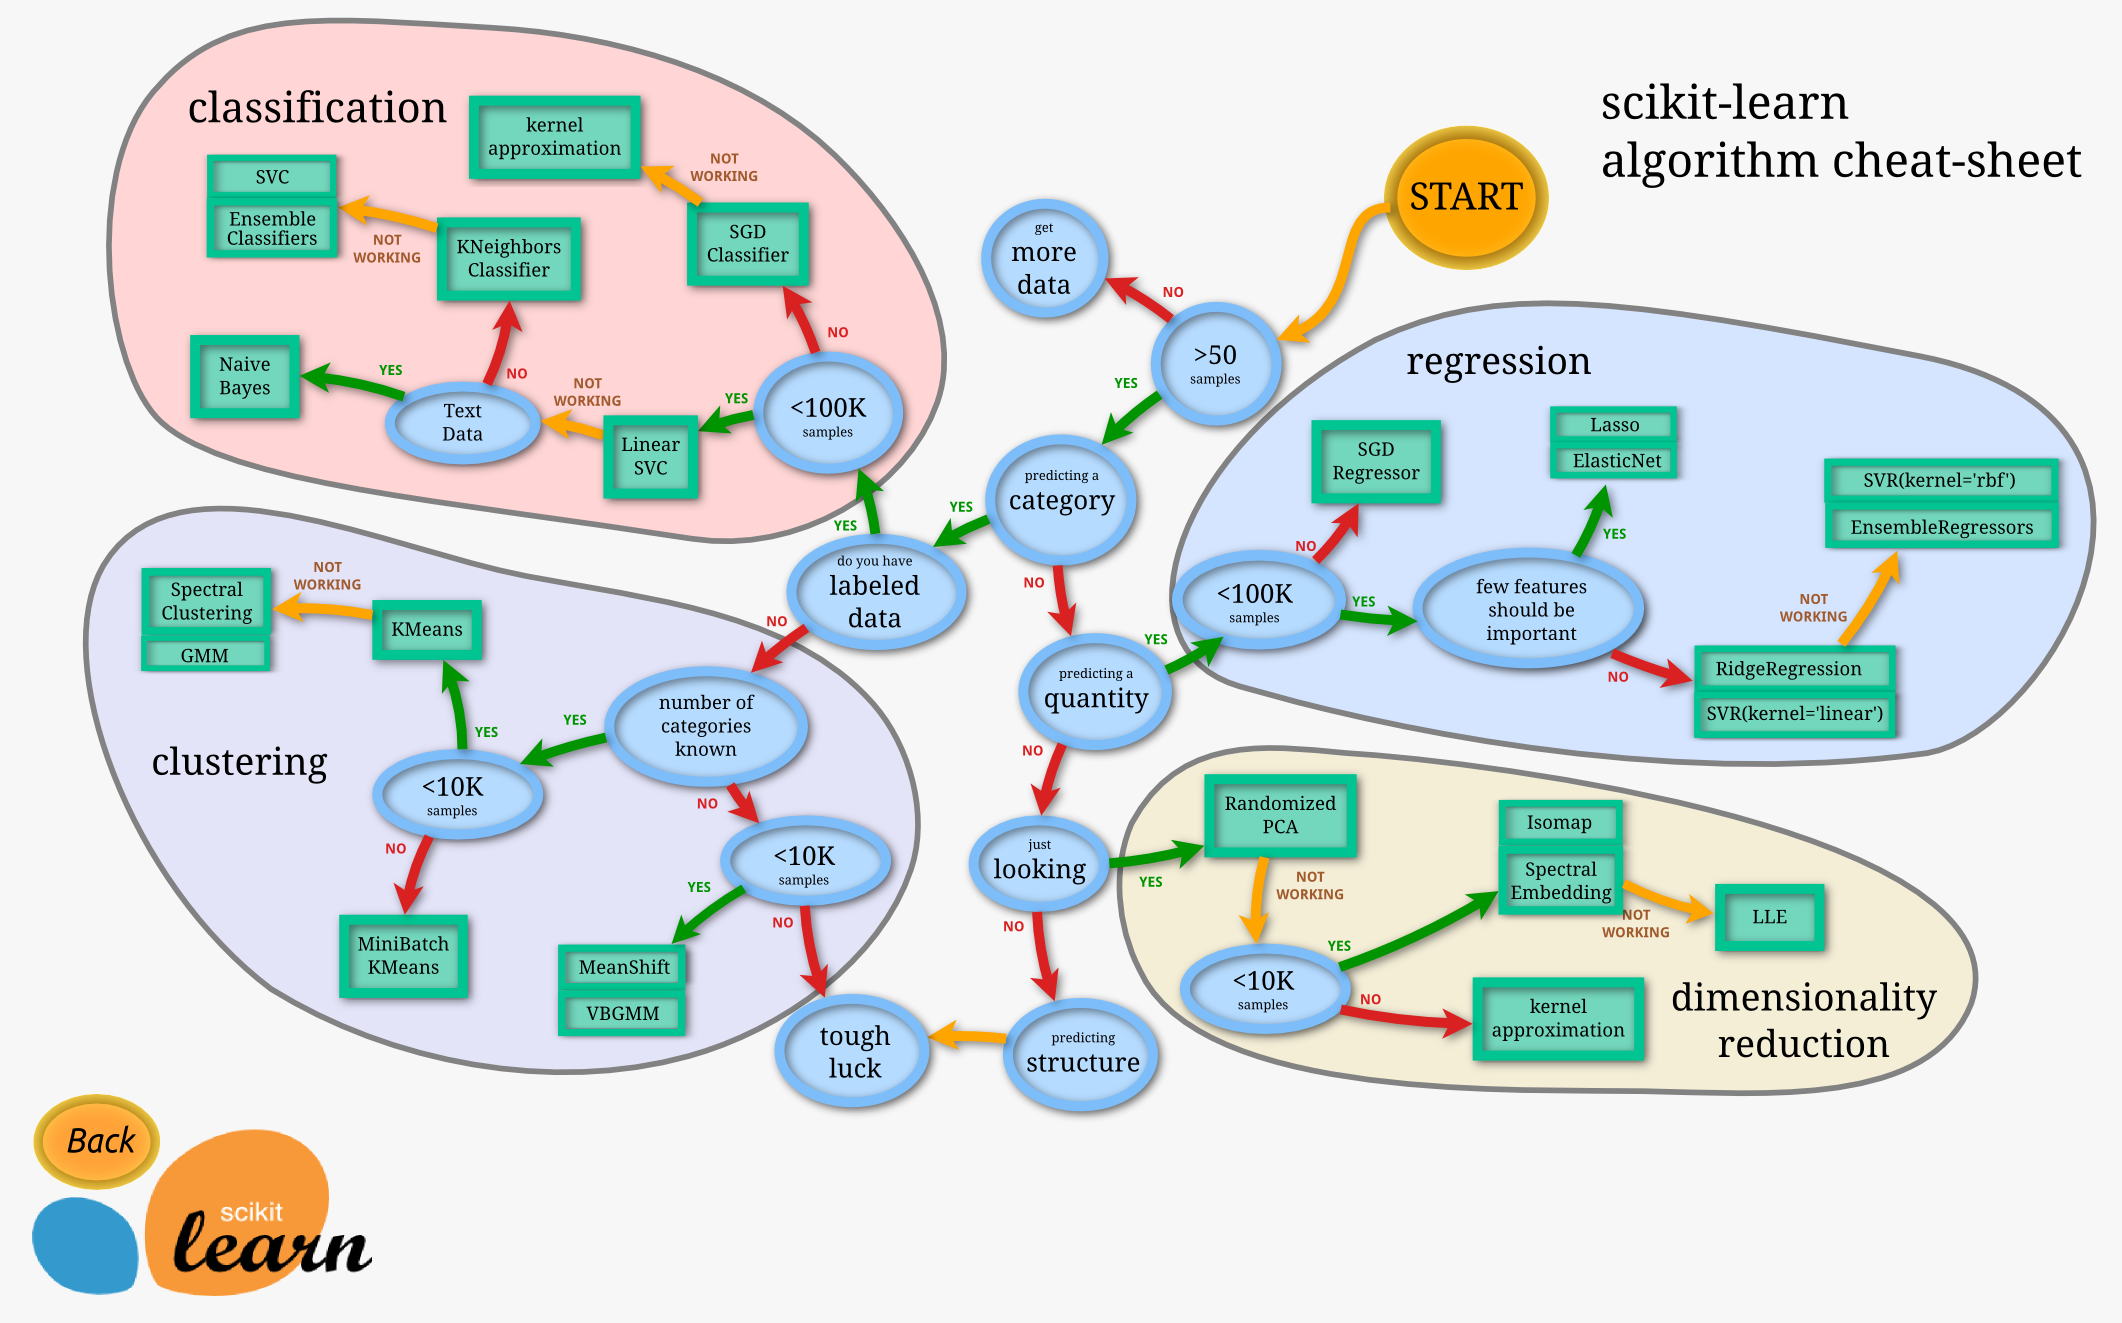

Classifiers:

a. Naïve Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html

b. Decision Tree: http://scikit-learn.org/stable/modules/tree.html

c. Nearest Neighbors: http://scikit-learn.org/stable/modules/neighbors.html

d. Support Vector Machine: http://scikit-learn.org/stable/modules/svm.html

e. Logistic Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

f. Ensemble: http://scikit-learn.org/stable/modules/ensemble.html 

### Creazione dati + labels

In [ ]:
#creazione matrice di features e vettore di label
X = data.drop(columns='class')
y = data['class']

#alternativa, passando per numpy

X_vettore = data.iloc[:,0:3].values
y_vettore = data['class'].values


### Train-Test splitting, using ML models & Evaluation

In [ ]:
#import per la valutazione dei modelli, creazione train test split e cross validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

#modelli ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

In [ ]:
#LISTA UTILE PER IMPORT DEI MODELLI

#feature selection and data processing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler #when you have many outliers 

#classification
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#regression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #least squares
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#CREAZIONE TRAIN E TEST CON MODELLO + FIT & PREDICT 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state=0) #test/train size e seed di shuffle da modificare (eventualmente)

model = KNeighborsClassifier()

model.fit(X_train,y_train)
predict = model.predict(X_test)

In [ ]:
#ROUNDING SU CLASSI NUMERICHE USANDO UN REGRESSORE

my_model = #your model here

#solo se ho classi numeriche che rappresentano categorie (es: versicolor = 0, virginica = 1 ,etc...)

min_value_class = data['class'].min() 
max_value_class = data['class'].max()

predictions = np.round(np.clip(my_model.predict(X_test), min_value_class,max_value_class))

#clip: limita i valori all'intervallo [min_value_class, max_value_class], arrotondando agli estremi i valori fuori dell'intervallo
#così non ottengo classi non esistenti quando faccio il rounding con np.round!

In [ ]:

X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['class'])

#statify mantiene le proporzioni della classe da predirre negli split!

### Evaluation

a. Accuracy Score http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

b. Cross Validation: http://scikit-learn.org/stable/modules/cross_validation.html

c. Confusion Matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

d. Grid Search http://scikit-learn.org/stable/modules/grid_search.html#grid-search

In [ ]:
#matrice di confusione ed accuracy

print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

#stampa matrice di confusione normalizzata secondo le classi presenti nel test/più facile da leggere
plot_confusion_matrix(model, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

#report: precision e recall + altre metriche (macro e micro)

print(classification_report(y_test,predict))

#Train e Test con CROSS VALIDATION - USARE I VETTORI X ed Y NON SPLITTATI: la CROSS VALIDATION fa tutto da sola

cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())
#oppure


In [ ]:
#TRUE NEGATIVES, FALSE POSITIVES, FALSE NEGATIVES E TRUE POSITIVES tramite confusion matrix 
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [ ]:
#CV STRATIFICATA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

num_folds = 10
SEED = 0
model = #your model here
scoring= 'accuracy'

kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

In [ ]:
#CROSS VALIDATE (diversa da cross_val_score)
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

print(scores['test_recall_macro'])

### Evaluating Multiple Models at once (with N-Folder Cross Validation)

In [ ]:
#Your list of models here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# prepare models, appending the ones you imported
models = []
models.append(('LR', LogisticRegression(solver='saga', max_iter=500)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))

#CLASSIFICATION

#models.append(('lSVM', LinearSVC() ))
#models.append(('SVM', SVC(gamma='scale') )) # can be also 'auto'
#models.append(('p2SVM', SVC(gamma='scale', kernel='poly', degree=2) ))
#models.append(('p3SVM', SVC(gamma='scale', kernel='poly', degree=3) ))
#models.append(('p4SVM', SVC(gamma='scale', kernel='poly', degree=4) ))
#models.append(('AB', AdaBoostClassifier() ))
#models.append(('NB', GaussianNB() ))
#models.append(('MNB', MultinomialNB() ))
#models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1500) ))
#models.append(('DT', DecisionTreeClassifier() ))
#models.append(('RF', RandomForestClassifier(n_estimators=10) ))
#models.append(('NN', MLPClassifier(max_iter=5000) )) troppo lento
#models.append(('KNN', KNeighborsClassifier() ))

# REGRESSION

#models.append(('lSVR', LinearSVR() ))
#models.append(('SVR', SVR(gamma='scale') ))
#models.append(('p2SVM', SVR(gamma='scale', kernel='poly', degree=2) ))
#models.append(('p3SVM', SVR(gamma='scale', kernel='poly', degree=3) ))
#models.append(('p4SVM', SVR(gamma='scale', kernel='poly', degree=4) ))
#models.append(('AB', AdaBoostRegressor() ))
#models.append(('LR', LinearRegression() ))
#models.append(('DT', DecisionTreeRegressor() ))
#models.append(('RI', Ridge() ))
#models.append(('LA', Lasso() ))
#models.append(('RF', RandomForestRegressor(n_estimators=10) ))
#models.append(('KNN', KNeighborsRegressor() ))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy' #can be changed to other scores
for name, model in models:
    cv_results = cross_val_score(model, X_train , y_train, cv=10, scoring=scoring) #folder number can be changed
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### ENSEMBLE VOTING
prendo dei classificatori allenati, anche diversi e decido la predizione in base alla maggioranza delle predizioni che fanno

In [ ]:
#ESEMPIO DI ENSEBLE VOTING

#dividere in due dataset train(3/4) e test(1/4)
msk = np.random.rand(len(dataset)) < 0.25
train = dataset1[~msk]
test = dataset1[msk]

#Considerare il Train. Dividerlo in 3 nuovi dataset.
#Month 1,2,3,4 --> dataset1
#Month 5,6,7,8 --> dataset2
#Month 9,10,11,12 --> dataset3
dataset_train1 = train[train["Month"] <= 4]
dataset_train2 = train[train["Month"] > 4]
dataset_train2 = dataset_train2[dataset_train2["Month"] <= 8]
dataset_train3 = train[train["Month"] > 8]

y_train1 = dataset_train1["Events"].astype('int')
y_train2 = dataset_train2["Events"].astype('int')
y_train3 = dataset_train3["Events"].astype('int')

#Eliminare l’attributo Month dai 3 dataset di training.
dataset_train1 = dataset_train1.drop(columns=["Month", "Events"])
dataset_train2 = dataset_train2.drop(columns=["Month", "Events"])
dataset_train3 = dataset_train3.drop(columns=["Month", "Events"])

#Eliminare l’attributo Month dal dataset di test
test = test.drop(columns=["Month"])
y_test_t = test["Events"].astype('int')
test = test.drop(columns=["Events"])

#Allenare 3 classificatori di tipo decisionTree con i 3 dataset.
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

dt1.fit(dataset_train1, y_train1)
dt2.fit(dataset_train2, y_train2)
dt3.fit(dataset_train3, y_train3)

#Effettuare la predizione del test con un sistema di votazione: la classe maggiormente predetta nei 3 dataset è quella che viene selezionata.
#Calcolare l’accuratezza dell’approccio
from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[dt1, dt2, dt3], weights=[1,1,1], refit=False)

#fit solo formale, non fa niente(refit=False in dichiarazione eclf)
eclf.fit(dataset_train1, y_train1)

#predict
pred = eclf.predict(test)
acc_voting = accuracy_score(y_test_t, pred)
print("Accuracy metodo a votazione: ", acc_voting)

## PIPELINES

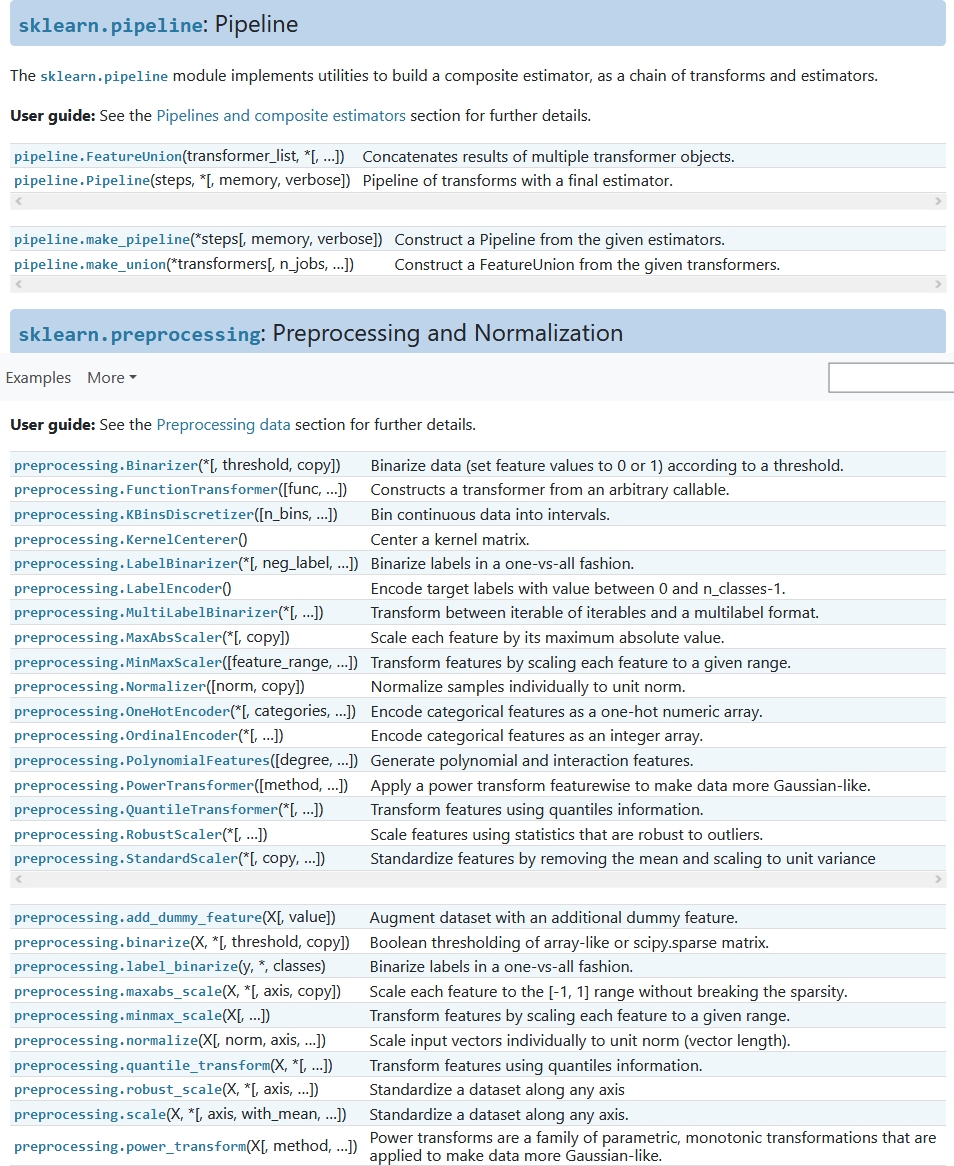

[Sklearn Pipelines](https://scikit-learn.org/stable/modules/compose.html#combining-estimators)

In [ ]:

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

from sklearn.impute import SimpleImputer #rimuove gli NaN

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler #when you have many outliers 

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE



In [ ]:
#SHORT, EASY TO USE, SIMPLE PIPELINE

from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

make_pipeline(StandardScaler(), GaussianNB(priors=None))

'''
Construct a Pipeline from the given estimators.
This is a shorthand for the Pipeline constructor; 
it does not require, and does not permit, naming the estimators. 
Instead, their names will be set to the lowercase of their types automatically.
'''

### Standard Pipeline

In [ ]:
#NORMALIZER + MINMAX SCALER

preprocessing_transformer = Pipeline(steps=[('normalize', Normalizer()),
                                            ('scale_01', MinMaxScaler(feature_range=(0, 1)))])
model = #your ML model here

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessing_transformer', preprocessing_transformer),
                              ('model', model)
                             ], verbose = True)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = accuracy_score(y_valid, preds)
print('Accuracy Score on valid:', score)

# Evaluate the model
score = accuracy_score(y_test, my_pipeline.predict(X_test))

print('Accuracy Score on test:', score)

### Column Tranformer Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
#COLUMN TRANSFORMER CON TRASFORMAZIONE *SPECIFICA* PER COLONNA

col_transformers = ColumnTransformer(transformers=[('ram', KBinsDiscretizer(n_bins=4, encode='ordinal'), ['ram']),#lista di colonne da trasformare con 4 bins
                                                   ('batt_pw', KBinsDiscretizer(n_bins=10, encode='ordinal'), ['battery_power']),#lista di colonne da trasformare con 10 bins
                                                   ],
                                      remainder='passthrough' #drop    (ignora le altre colonne oppure ,con drop, le elimina)
                                  
                                     )

#al posto di ['ram'] e ['battery_power'] posso passare una lista di colonne rinominata come variabile

preprocessing = Pipeline(steps=[('col_transformers', col_transformers), #applica a tutto il dataset maxabsscaler e normalizer
                                ('maxAbs', MaxAbsScaler()),
                                ('normalizer', Normalizer())])

model = DecisionTreeClassifier()

my_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                              ('model', model)]) #applica il modello alla pipeline

#split del dataset ed allenamento

X = dataset.drop(['price_range'], axis=1).copy()
y = dataset.price_range.copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=0)

my_pipeline.fit(X_train,y_train)
pred = my_pipeline.predict(X_test)

### Feature Union Pipeline

In [ ]:
from sklearn.pipeline import FeatureUnion

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=2)

#Normalizing is always a good choice
scaler = MinMaxScaler(feature_range=(0, 1))

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection), ("normal", scaler)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)
print("Combined space has", X_features.shape[1], "features")

model = LogisticRegression()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('combined_features', combined_features),
                              ('model', model)
                             ], verbose = True)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = accuracy_score(y_valid, preds)
print('Accuracy Score:', score)

### Function Transformer + Pipeline

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def my_custom_function(X):
  #code here
  return X #change this

fill_na_transformer = Pipeline(steps=[ ('my_custom_transformer', FunctionTransformer(my_custom_function, validate=False)), #occhio al validate (se True devo passare numpy)
                                       ('fill_na', SimpleImputer(strategy='most_frequent'))  ])


model = RandomForestRegressor(n_estimators=100, random_state=0)



# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', fill_na_transformer),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# 6)ALGORITHM TUNING

## Grid Search

In [ ]:
#RANDOM SEARCH PER IPERPARAMETRI

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha':uniform()}
seed = 42
iterations = 100
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=iterations,random_state=seed)
rsearch.fit(X,y)
print(rsearch.best_score_)
print(rsearch.best_params_)
print(rsearch.best_estimator_.alpha)

In [ ]:
#ESEMPIO GRID SEARCH DI IPERPARAMETRI PER IL MODELLO KNN

from sklearn.model_selection import GridSearchCV


tuned_parameters = [{'n_neighbors': [5,8,10,15,20], 'weights': ['uniform', 'distance'], 
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                     }]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10,
                       scoring= score)
    clf.fit(X_train_norm, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_valid, clf.predict(X_test_norm)
    print(classification_report(y_true, y_pred))
    print()

## Grid Search for Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'model__n_estimators': [10,50,100,200],
    'preprocessing_transformer__binBin__n_bins': [50,100,200],
    'preprocessing_transformer__binBin__strategy': ['uniform','quantile'],
}

gs_clf = GridSearchCV(my_pipeline, parameters,  cv=10, n_jobs=-1)
gs_clf.fit(X_train, y_train)

gs_clf.best_params_

my_pipeline.set_params(**gs_clf.best_params_)
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = accuracy_score(y_valid, preds)
print('Accuracy Score on valid:', score)

# Evaluate the model
score = accuracy_score(y_test, my_pipeline.predict(X_test))
#score = accuracy_score(y_test, my_pipeline.predict(X_test))

print('Accuracy Score on test:', score)

## Grid Search + Grid Search Randomico con funzioni implementate

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

class RandomSearch(object): #funzione random search
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters  #devo passare un dizionario, occhio!
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

class GridSearch(object): #funzione grid search
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

#ESEMPIO CON MODELLO LOGISTIC REGRESSION

model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

# 7)Make predictions - confusion matrix & classification report

Vedi punto 4 -> Evaluation (accuracy, cross-validation e confusion matrix)

### Analisi learning curves e validation curves

In [ ]:
from sklearn.model_selection import learning_curve
cv = 5
scoring = 'f1_micro'
model = LogisticRegression()
n_ticks, train_scores, test_scores = learning_curve(model,
                                                    X,
                                                    y,
                                                    cv=cv,
                                                    scoring=scoring
                                                   )

train = np.mean(train_scores, axis=1)
test = np.mean(test_scores, axis=1)

plt.plot(n_ticks, train, color='red')
plt.plot(n_ticks, test, color='blue')
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
min_p = 0.0001
max_p = 0.3
step = 0.02
param = 'C'
cv = 5
scoring = 'f1_micro'
model = LogisticRegression()

train_scores, test_scores = validation_curve(model, 
                                             X, 
                                             y, 
                                             param_name=param,
                                             param_range=np.arange(min_p, max_p, step),
                                             cv=cv,
                                             scoring=scoring
                                            )
train = np.mean(train_scores, axis=1)
test = np.mean(test_scores, axis=1)
x_axis = np.arange(min_p, max_p, step)

plt.plot(x_axis, train, color='red')
plt.plot(x_axis, test, color='blue')
plt.show()

index = np.argmax(test)
best_p = min_p + index * step
best_p

model.set_params(C=best_p)

# COMANDI UTILI

### Utilizzare dataset bilanciati

In [ ]:
# balance two dataset, cutting biggest dataset
# smaller rules

tobalance = data[data['AC_CLASS']==1] # bigger
balancer = data[data['AC_CLASS']==0] # smaller

tobalance = tobalance.sample(len(balancer))

data_bal = pd.concat([balancer, tobalance])
data_bal.groupby('AC_CLASS').size()

AC_CLASS
0    482
1    482
dtype: int64

In [ ]:
# balance a data with resampling
# bigger rules or intermidiate value
from sklearn.utils import resample

balancer = data[data['AC_CLASS']==1] # bigger
tobalance = data[data['AC_CLASS']==0] # smaller

# bilanciamo le classi 
tobalance = resample(tobalance, replace=True, n_samples=5000) # can be also n_samples=len(balancer)
balancer = resample(balancer, replace=True, n_samples=5000)

data_bal = pd.concat([balancer, tobalance])
data_bal.groupby('AC_CLASS').size()

AC_CLASS
0    5000
1    5000
dtype: int64

### Pipeline PCA aggiunta al dataset originale + valutazione su file dataset_train e file dataset_test + rounding con regressore

In [ ]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=5)

def identity_func(X):
  return X

combined = FeatureUnion([("pca", pca),('passtrough',FunctionTransformer(identity_func,validate=False))])
#creo 5 colonne con pca unite al dataset originale, tramite una funzione identità con FunctionTransformer

norm = Normalizer()
scaler = StandardScaler()
model = Ridge()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('combined', combined),
                              ('scaler', scaler),
                              ('normalizer',norm),
                              ('model', model)
                             ], verbose = True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    test_size=1/3,
                                                    train_size=2/3 ,
                                                    stratify=dataset['weather_main'],
                                                    random_state=0)


my_pipeline.fit(X_train, y_train)

print("\nEVALUATION OF WEATHER_TRAIN DATASET\n")
#EVALUATION ON TRAIN PART OF WEATHER TRAIN

preds = np.round(np.clip(my_pipeline.predict(X_train), 0,2))
print("\ntrain preds:",preds)

score = accuracy_score(y_train, preds)
print('\nAccuracy Score on TEST:', score,"\n")

print("Confusion Matrix:\n", confusion_matrix(y_train, preds))

#EVALUATION ON VALID PART OF WEATHER TRAIN

preds = np.round(np.clip(my_pipeline.predict(X_valid), 0,2))
#NP.CLIP: se vado fuori dall'intervallo [0,2], sostituisco 0 o 2 a seconda di dove ho "sforato" (numero>2 o <0)
print("\nvalid preds:",preds)

score = accuracy_score(y_valid, preds)
print('\nAccuracy Score on TEST:', score,"\n")
print("Confusion Matrix:\n", confusion_matrix(y_valid, preds))

print("----------------------------------------------------")

#EVALUATION ON WEATHER TEST
print("\nEVALUATION OF WEATHER_TRAIN DATASET\n")

X_test = test
y_test = label

preds = np.round(np.clip(my_pipeline.predict(X_test), 0,2))
print("\nfinal test preds:",preds)

score = accuracy_score(y_test, preds)
print('\nAccuracy Score on TEST:', score,"\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


### Confronto di più modelli ML

In [ ]:
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results


models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

comparison = pd.DataFrame(np.array(results).T, columns=names)
print(comparison.head())

comparison.plot(kind='box')

def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

basedLineScore = ScoreDataFrame(names,results)
basedLineScore

### Rimozione Outliers

In [ ]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

#feature_number = 0
#OutLiersBox(df,df_name[feature_number])
for i in range(len(df_name[:-1])):
    plt.figure()
    df[df_name[i]].plot(kind='box')
    df_clean = TurkyOutliers(df,df_name[i],True)
    plt.figure()
    df_clean[df_name[i]].plot(kind='box')

print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))